In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [ ]:
!gdown --id '1fpmRXRYFEvuujjxHTm05lFLLI-8_T-Y5' --output level-6.csv

Downloading...
From: https://drive.google.com/uc?id=1fpmRXRYFEvuujjxHTm05lFLLI-8_T-Y5
To: /content/level-6.csv
100% 183k/183k [00:00<00:00, 69.5MB/s]


In [ ]:
train = pd.read_csv("level-6.csv")
train.head()

,index,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Beutenbergiaceae;Miniimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Brachybacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,...,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Haemophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Pasteurella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;__,Bacteria;Proteobacteria;Gammaproteob

In [ ]:
shortrun = train[train['merged'] < 19250].index
train = train.drop(shortrun,axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 371 entries, index to Clinical
dtypes: float64(368), int64(1), object(2)
memory usage: 377.8+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 371 entries, index to Clinical
dtypes: float64(368), int64(1), object(2)
memory usage: 377.8+ KB


In [ ]:
CAT_COL = ["index", "Clinical"]

NUM_COL=[]
for i in range(len(train.columns)):
  NUM_COL.append(train.columns[i])
NUM_COL.remove('index')
NUM_COL.remove('Clinical')

cat_col = []
num_col = []
for col in train:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)
for col in cat_col:
  train[col] = train[col].astype(str)

df_cat = train.loc[:,cat_col] # take all the categorical columns
df_cat = pd.get_dummies(df_cat) # one hot encoding

df_num = train.loc[:,num_col] # take all the numerical columns
df_final = pd.concat([df_cat, df_num], axis=1) # concat categorical/numerical data

In [ ]:
df_final.head()

,index_SRR10717942,index_SRR10717943,index_SRR10717944,index_SRR10717945,index_SRR10717947,index_SRR10717950,index_SRR10717951,index_SRR10717952,index_SRR10717953,index_SRR10717954,index_SRR10717956,index_SRR10717957,index_SRR10717958,index_SRR10717959,index_SRR10717960,index_SRR10717961,index_SRR10717963,index_SRR10717964,index_SRR10717965,index_SRR10717966,index_SRR10717967,index_SRR10717968,index_SRR10717969,index_SRR10717970,index_SRR10717971,index_SRR10717972,index_SRR10717973,index_SRR10717974,index_SRR10717975,index_SRR10717976,index_SRR10717977,index_SRR10717978,index_SRR10717979,index_SRR10717980,index_SRR10717981,index_SRR10717983,index_SRR10717984,index_SRR10717985,index_SRR10717986,index_SRR10717988,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Yersiniaceae;Serratia,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Haemophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Pasteurella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Alkanindiges,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Enhydrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Moraxella,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;__;__,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Nevskia,Bacteria;Proteobacteria;Gammaproteobacteria;Thiotrichales;Thiotrichaceae;Thiothrix,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Photobacterium,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Ahniella,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Pseudofulvimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Rhodanobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Luteimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Lysobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Pseudoxanthomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Stenotrophomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Xanthomonas,Bacteria;Proteobacteria;Gammaproteobacteria;__;__;__,Bacteria;Proteobacteria;__;__;__;__,Bacteria;SAR324_clade(Marine_group_B);uncultured_bacterium;;__;__,Bacteria;Spirochaetota;Spirochaetia;Spirochaetales;Spirochaetaceae;Treponema,Bacteria;Synergistota;Synergistia;Synergistales;Synergistaceae;Fretibacterium,Bacteria;Verrucomicrobiota;Chlamydiae;Chlamydiales;__;__,Bacteria;Verrucomicrobiota;Omnitrophia;Omnitrophales;Omnitrophaceae;Candidatus_Omnitrophus,Bacteria;__;__;__;__;__,Unassigned;__;__;__;__;__,merged
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.060593,0.0,0.0,0.000477,0.0,0.084239,0.0,0.0,0.0,0.0,0.013825,0.0,0.0,0.0,0.0,

In [ ]:
not_select = ["index", "Clinical", "merged"]
train_select = train.drop(not_select,axis=1)
train_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 368 entries, Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium to Unassigned;__;__;__;__;__
dtypes: float64(368)
memory usage: 374.8 KB


In [ ]:
cat_col = []
num_col = []
for col in train_select:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)

for col in cat_col:
  if train_select[col].dtype != "O":
    # print(col)
    train_select[col] = train_select[col].astype(str)

df_cat_select = train_select.loc[:,cat_col] # take all the categorical columns
#df_cat_select = pd.get_dummies(df_cat_select) # one hot encoding

df_num_select = train_select.loc[:,num_col] # take all the numerical columns
df_final_select = pd.concat([df_cat_select, df_num_select], axis=1) # concat categorical/numerical data

In [ ]:
df_final_select.head()

,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Beutenbergiaceae;Miniimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Brachybacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Curtobacterium,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Yersiniaceae;Serratia,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pas

#Random Forest Classifier

In [ ]:
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use RandomForestClassifier to predict Clinical
  x = df_final_select
  y = train["Clinical"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  #RandomForest
  rfc = RandomForestClassifier(n_estimators=1000)
  #rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
  rfc.fit(X_train,y_train)
  y_predict = rfc.predict(X_test)
  score_rfc = rfc.score(X_test,y_test)
  score_rfc_train = rfc.score(X_train,y_train)
  print("train_accuracy = ",score_rfc_train*100," %")
  print("val_accuracy = ",score_rfc*100," %")
  train_accuracy.append(score_rfc_train)
  val_accuracy.append(score_rfc)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
  # from sklearn.metrics import confusion_matrix
  # mat = confusion_matrix(y_test, y_predict)
  # sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
  # plt.xlabel('true label')
  # plt.ylabel('predicted label')
print('avg_val_accuracy = ',round(avg_val_accuracy,4))
print('avg_train_accuracy = ',round(avg_train_accuracy,4))

train_accuracy =  100.0  %
val_accuracy =  53.84615384615385  %
train_accuracy =  100.0  %
val_accuracy =  57.692307692307686  %
train_accuracy =  100.0  %
val_accuracy =  53.84615384615385  %
train_accuracy =  100.0  %
val_accuracy =  57.692307692307686  %
train_accuracy =  100.0  %
val_accuracy =  53.84615384615385  %
train_accuracy =  100.0  %
val_accuracy =  57.692307692307686  %
train_accuracy =  100.0  %
val_accuracy =  53.84615384615385  %
train_accuracy =  100.0  %
val_accuracy =  53.84615384615385  %
train_accuracy =  100.0  %
val_accuracy =  53.84615384615385  %
train_accuracy =  100.0  %
val_accuracy =  50.0  %
avg_val_accuracy =  0.5462
avg_train_accuracy =  1.0


Text(91.68, 0.5, 'predicted label')

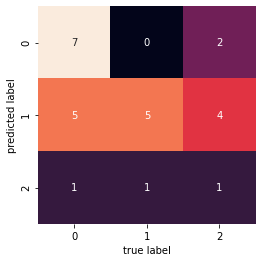

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#SVM

In [ ]:
from sklearn import svm
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use SVM to predict Clinical
  x = df_final_select
  y = train["Clinical"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  clf = svm.SVC()
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  score_clf = clf.score(X_test,y_test)
  score_clf_train = clf.score(X_train,y_train)
  print("train_accuracy = ",score_clf_train*100," %")
  print("val_accuracy = ",score_clf*100," %")
  train_accuracy.append(score_clf_train)
  val_accuracy.append(score_clf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
train_accuracy =  76.92307692307693  %
val_accuracy =  46.15384615384615  %
avg_train_accuracy =  0.7692
avg_val_accuracy =  0.4615


Text(91.68, 0.5, 'predicted label')

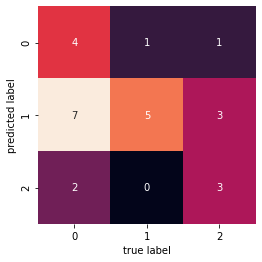

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Neural network MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use Neural Network MLPClassifier to predict Clinical
  x = df_final_select
  y = train["Clinical"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  nnclf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 30), random_state=1, max_iter=2000)
  nnclf.fit(X_train,y_train)
  y_predict = nnclf.predict(X_test)
  score_nnclf = nnclf.score(X_test,y_test)
  score_nnclf_train = nnclf.score(X_train,y_train)
  print("train_accuracy = ",score_nnclf_train*100," %")
  print("val_accuracy = ",score_nnclf*100," %")
  train_accuracy.append(score_nnclf_train)
  val_accuracy.append(score_nnclf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
train_accuracy =  100.0  %
val_accuracy =  46.15384615384615  %
avg_train_accuracy =  1.0
avg_val_accuracy =  0.4615


Text(91.68, 0.5, 'predicted label')

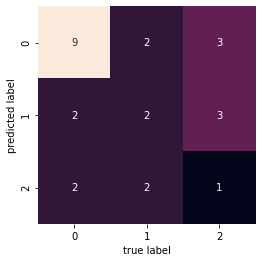

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use Logistic Regression to predict Clinical
  x = df_final_select
  y = train["Clinical"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  logclf = LogisticRegression(random_state=0).fit(X_train,y_train)
  y_predict = logclf.predict(X_test)
  score_logclf = logclf.score(X_test,y_test)
  score_logclf_train = logclf.score(X_train,y_train)
  print("train_accuracy = ",score_logclf_train*100," %")
  print("val_accuracy = ",score_logclf*100," %")
  train_accuracy.append(score_logclf_train)
  val_accuracy.append(score_logclf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
train_accuracy =  50.96153846153846  %
val_accuracy =  30.76923076923077  %
avg_train_accuracy =  0.5096
avg_val_accuracy =  0.3077


Text(91.68, 0.5, 'predicted label')

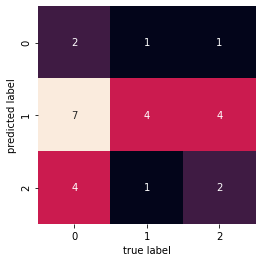

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#DNN

In [ ]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [ ]:
target_var = 'Clinical'
features = list(df_final_select.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(df_final_select[features], train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
np.random.seed(5)
# model
init = K.initializers.glorot_uniform(seed=1)
model = K.models.Sequential()
model.add(K.layers.Dense(units=30, input_dim=368, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=3, kernel_initializer=init, activation='relu'))

In [ ]:
# 訓練模型
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h = model.fit(train_x, train_y, epochs=10, batch_size=1,
      validation_data=(test_x, test_y))

Epoch 1/10
104/104 [==============================] - 1s 6ms/step - loss: 6.6370 - accuracy: 0.2692 - val_loss: 1.8913 - val_accuracy: 0.2692
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 1.8310 - accuracy: 0.3173 - val_loss: 1.2122 - val_accuracy: 0.3077
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 1.3909 - accuracy: 0.3750 - val_loss: 1.1378 - val_accuracy: 0.2308
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 1.3281 - accuracy: 0.4038 - val_loss: 1.1468 - val_accuracy: 0.3077
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 1.2831 - accuracy: 0.4615 - val_loss: 1.1508 - val_accuracy: 0.2692
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 1.2428 - accuracy: 0.5000 - val_loss: 1.1631 - val_accuracy: 0.2692
Epoch 7/10
104/104 [==============================] - 0s 3ms/step - loss: 1.1925 - accuracy: 0.5769 - val_loss: 1.2084 - val_accuracy: 0.2692
Epoch 

|train_accuracy|val_accuracy|
|-----|--------|
|0.7596| 0.4231|  
|0.7885| 0.3077|
|0.6058| 0.3077|
|0.5673| 0.4231|
|0.7885| 0.3077|
|0.7788| 0.4231|
|0.7404| 0.3077|
|0.7500| 0.3462|
|0.5673| 0.3846|
|0.8269| 0.3462|

In [ ]:
train_accuracy = [0.7596,0.7885,0.6058,0.5673,0.7885,0.7788,0.7404,0.7500,0.5673,0.8269]
val_accuracy = [0.4231,0.3077,0.3077,0.4231,0.3077,0.4231,0.3077,0.3462,0.3846,0.3462]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.7173
avg_val_accuracy =  0.3577


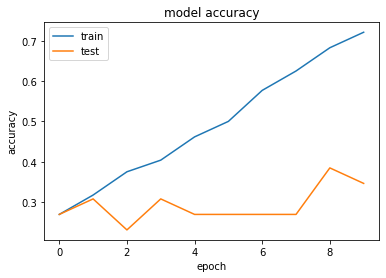

In [ ]:
#0.7596/0.4231
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

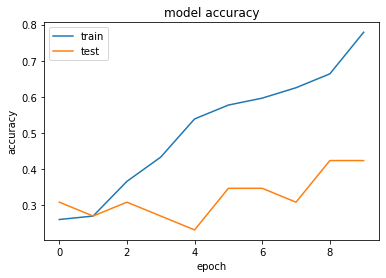

In [ ]:
#0.7788/0.4231
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#PH-CNN
##reference:
###https://github.com/dfioravanti/phylogenetic-cnn
###https://www.tensorflow.org/tutorials/images/cnn

In [ ]:
import os
from tensorflow.keras import datasets, layers, models

# from phcnn.layers import PhyloConv1D, euclidean_distances
# from keras.utils.np_utils import to_categorical

# from keras.layers import (Lambda, MaxPooling1D, Flatten, Dropout, Dense, Input)
# from keras.models import Model
# from keras.backend import floatx

##Import coordinate data

In [ ]:
#reshape
!gdown --id '1dBimDrlyC6eHRcPbCIuj7PzgAwJ-VSby' --output ordinate.csv
C = pd.read_csv("ordinate.csv")
# Xs = df_final_select.values

Downloading...
From: https://drive.google.com/uc?id=1dBimDrlyC6eHRcPbCIuj7PzgAwJ-VSby
To: /content/ordinate.csv
100% 207k/207k [00:00<00:00, 49.7MB/s]


In [ ]:
# not_select = ['SRR10717998', 'SRR10718078', 'SRR10718037', 'SRR10718080', 'SRR10717987', 'SRR10718039', 'SRR10718095', 'SRR10718000',
#  'SRR10718082', 'SRR10718060', 'SRR10718016', 'SRR10717949', 'SRR10718052', 'SRR10718067', 'SRR10717990', 'SRR10718001',
#  'SRR10717993', 'SRR10717955','SRR10718024', 'SRR10718096', 'SRR10718044', 'SRR10717946', 'SRR10718092', 'SRR10718047',
#  'SRR10717948', 'SRR10718089', 'SRR10718097','SRR10718055', 'SRR10718013', 'SRR10718076', 'SRR10718014', 'SRR10718049',
#  'SRR10717962', 'SRR10717982', 'SRR10718071', 'SRR10717991', 'SRR10718075', 'SRR10718073']
shortrun = C[C['merged'] < 19250].index
C = C.drop(shortrun,axis=0)
C.head()

,index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,merged
0,SRR10717942,-0.148863,-0.015859,-0.182425,0.036586,-0.060318,-0.010474,-0.073774,0.022891,0.045670,0.009416,0.003135,-0.048164,-0.043423,0.046419,-0.015531,0.016605,0.067995,-0.019294,0.002615,-0.063570,-0.008053,0.053429,-0.005841,-0.032327,0.000089,0.026441,-0.003692,0.000019,0.043579,-0.021603,0.006190,0.003795,0.025930,-0.039945,-0.036880,-0.012962,0.046948,0.017464,-0.025889,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23645
1,SRR10717943,-0.155874,-0.015489,-0.166780,0.040794,-0.040257,0.015205,0.039951,-0.042126,-0.024423,0.016980,-0.015751,0.007062,-0.029513,-0.017791,0.047194,0.018195,0.002031,0.030278,-0.037003,-0.001940,0.022938,-0.013325,0.061446,0.015850,-0.005763,-0.008191,-0.023836,0.002106,-0.020018,-0.002994,-0.013115,-0.038409,0.016884,0.010377,0.013561,-0.013599,-0.019550,-0.033015,-0.032819,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22937
2,SRR10717944,-0.212688,0.126506,0.136332,0.149565,-0.107294,0.068687,-0.042806,-0.023720,0.053022,0.052038,0.067566,0.025259,-0.044514,0.037947,0.016528,-0.044443,-0.037207,0.065178,0.010344,-0.019677,-0.013522,-0.012546,0.010742,-0.023155,0.027363,-0.038568,-0.011360,0.009473,-0.012771,-0.001583,-0.003747,0.026933,-0.036237,0.033401,0.007992,-0.034118,0.002309,0.028903,0.007183,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23355
3,SRR10717945,-0.036509,-0.026844,0.033635,0.126231,0.113269,0.034193,0.020957,-0.012934,0.042122,-0.020769,0.045778,-0.063197,0.003277,-0.043442,0.001005,0.032437,0.004249,0.014258,0.005888,0.029863,-0.007705,0.050286,0.028003,0.015712,0.001625,0.004379,-0.053675,0.011616,0.015696,0.006473,-0.006499,0.024532,-0.015546,-0.007611,-0.001774,0.056346,0.024639,0.017048,0.023227,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19504
5,SRR10717947,-0.171395,-0.068856,-0.069648,-0.037126,0.094986,0.026219,0.055954,0.030454,-0.074112,0.052688,-0.018514,-0.004871,-0.034680,-0.025276,0.009162,-0.044719,0.005188,-0.002254,0.000137,-0.035925,-0.039550,-0.032502,0.016004,-0.011044,-0.022212,0.020685,0.035681,0.011047,-0.014573,-0.039898,-0.013890,0.000235,0.017508,0.023251,-0.020433,-0.006334,0.002924,0.000900,0.017421,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29110


In [ ]:
not_select=['index', 'merged']
C_final = C.drop(not_select,axis=1)
C_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 168 entries, 1 to 168
dtypes: float64(84), int64(84)
memory usage: 171.6 KB


In [ ]:
C_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168
0,-0.148863,-0.015859,-0.182425,0.036586,-0.060318,-0.010474,-0.073774,0.022891,0.045670,0.009416,0.003135,-0.048164,-0.043423,0.046419,-0.015531,0.016605,0.067995,-0.019294,0.002615,-0.063570,-0.008053,0.053429,-0.005841,-0.032327,0.000089,0.026441,-0.003692,0.000019,0.043579,-0.021603,0.006190,0.003795,0.025930,-0.039945,-0.036880,-0.012962,0.046948,0.017464,-0.025889,0.018509,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.155874,-0.015489,-0.166780,0.040794,-0.040257,0.015205,0.039951,-0.042126,-0.024423,0.016980,-0.015751,0.007062,-0.029513,-0.017791,0.047194,0.018195,0.002031,0.030278,-0.037003,-0.001940,0.022938,-0.013325,0.061446,0.015850,-0.005763,-0.008191,-0.023836,0.002106,-0.020018,-0.002994,-0.013115,-0.038409,0.016884,0.010377,0.013561,-0.013599,-0.019550,-0.033015,-0.032819,-0.065783,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.212688,0.126506,0.136332,0.149565,-0.107294,0.068687,-0.042806,-0.023720,0.053022,0.052038,0.067566,0.025259,-0.044514,0.037947,0.016528,-0.044443,-0.037207,0.065178,0.010344,-0.019677,-0.013522,-0.012546,0.010742,-0.023155,0.027363,-0.038568,-0.011360,0.009473,-0.012771,-0.001583,-0.003747,0.026933,-0.036237,0.033401,0.007992,-0.034118,0.002309,0.028903,0.007183,-0.023905,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.036509,-0.026844,0.033635,0.126231,0.113269,0.034193,0.020957,-0.012934,0.042122,-0.020769,0.045778,-0.063197,0.003277,-0.043442,0.001005,0.032437,0.004249,0.014258,0.005888,0.029863,-0.007705,0.050286,0.028003,0.015712,0.001625,0.004379,-0.053675,0.011616,0.015696,0.006473,-0.006499,0.024532,-0.015546,-0.007611,-0.001774,0.056346,0.024639,0.017048,0.023227,0.018659,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.171395,-0.068856,-0.069648,-0.037126,0.094986,0.026219,0.055954,0.030454,-0.074112,0.052688,-0.018514,-0.004871,-0.034680,-0.025276,0.009162,-0.044719,0.005188,-0.002254,0.000137,-0.035925,-0.039550,-0.032502,0.016004,-0.011044,-0.022212,0.020685,0.035681,0.011047,-0.014573,-0.039898,-0.013890,0.000235,0.017508,0.023251,-0.020433,-0.006334,0.002924,0.000900,0.017421,-0.040708,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X1 = df_final_select.values
# X2 = C_final.values
# X_final = np.concatenate((X1, X2),axis=1)
X_final = pd.concat([df_final_select, C_final], axis=1)
X_final.shape

(130, 536)

In [ ]:
target_var = 'Clinical'
features = list(X_final.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(X_final[features], train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
train_x = train_x.values.reshape(104, 2, 2, 134)
train_x = train_x.reshape(104, 2, 2, 134)
# train_x = train_x.reshape(78, 67, 8, 1)
test_x = test_x.values.reshape(26, 2, 2, 134)
test_x = test_x.reshape(26, 2, 2, 134)
# test_x = test_x.reshape(52, 67, 8, 1)

## Model

In [ ]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(134, (1, 1), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.Conv2D(67, (1, 1), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.MaxPooling2D((2, 2)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(64, activation= 'relu'))
model.add(K.layers.Dropout(0.25))
model.add(K.layers.Dense(3,activation='sigmoid'))
# model.add(K.layers.Conv2D(64, (1, 1), activation='sigmoid'))
# model.add(K.layers.MaxPooling2D((2, 2)))
# model.add(K.layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 134)         18090     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 67)          9045      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 67)          0         
_________________________________________________________________
flatten (Flatten)            (None, 67)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4352      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=10, batch_size=1,
      validation_data=(test_x, test_y))

Epoch 1/10
104/104 [==============================] - 1s 6ms/step - loss: 1.1032 - accuracy: 0.3558 - val_loss: 1.0962 - val_accuracy: 0.2308
Epoch 2/10
104/104 [==============================] - 0s 5ms/step - loss: 1.0903 - accuracy: 0.4038 - val_loss: 1.1069 - val_accuracy: 0.3846
Epoch 3/10
104/104 [==============================] - 0s 5ms/step - loss: 1.0805 - accuracy: 0.4712 - val_loss: 1.0749 - val_accuracy: 0.4615
Epoch 4/10
104/104 [==============================] - 0s 5ms/step - loss: 1.0620 - accuracy: 0.5096 - val_loss: 1.0749 - val_accuracy: 0.4231
Epoch 5/10
104/104 [==============================] - 0s 4ms/step - loss: 1.0269 - accuracy: 0.6154 - val_loss: 1.1010 - val_accuracy: 0.3462
Epoch 6/10
104/104 [==============================] - 0s 4ms/step - loss: 0.9853 - accuracy: 0.6538 - val_loss: 1.0370 - val_accuracy: 0.4615
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 0.9232 - accuracy: 0.6635 - val_loss: 1.0624 - val_accuracy: 0.4231
Epoch 

|train_accuracy|val_accuracy|
|-----|--------|
|0.7500| 0.5000|  
|0.8077| 0.4231|
|0.7885| 0.4231|
|0.7404| 0.5385|
|0.7885| 0.5769|
|0.7981| 0.4615|
|0.8558| 0.5385|
|0.8077| 0.5000|
|0.8173| 0.5000|
|0.8462| 0.5385|

In [ ]:
train_accuracy = [0.7500,0.8077,0.7885,0.7404,0.7885,0.7981,0.8558,0.8077,0.8173,0.8462]
val_accuracy = [0.5000,0.4231,0.4231,0.5385,0.5769,0.4615,0.5385,0.5000,0.5000,0.5385]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.8
avg_val_accuracy =  0.5


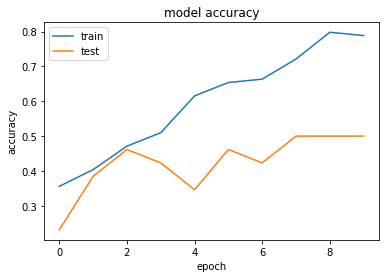

In [ ]:
#0.7500/0.5000
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

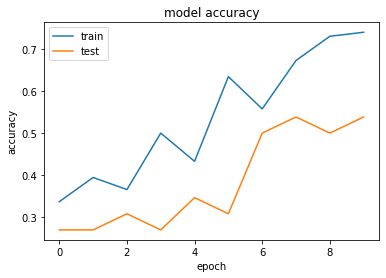

In [ ]:
#0.7404/0.5385
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

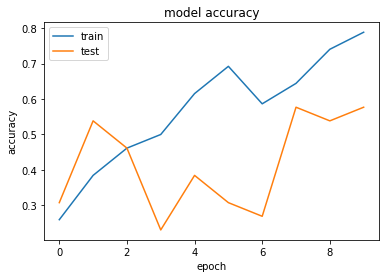

In [ ]:
#0.7885/0.5769
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#GCN

In [ ]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [ ]:
!gdown --id '1L1rAD3KHSPhgE1cRCfWz0jBD161TNOHQ' --output A.csv
!gdown --id '1YYsRjd6mGke6nUuYQ2UoRC1mhOOQ5i0z' --output D.csv
A = pd.read_csv("A.csv",header=None)
D = pd.read_csv("D.csv",header=None)

Downloading...
From: https://drive.google.com/uc?id=1L1rAD3KHSPhgE1cRCfWz0jBD161TNOHQ
To: /content/A.csv
100% 334k/334k [00:00<00:00, 47.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YYsRjd6mGke6nUuYQ2UoRC1mhOOQ5i0z
To: /content/D.csv
100% 56.8k/56.8k [00:00<00:00, 20.4MB/s]


In [ ]:
train = pd.read_csv("level-6.csv")
train.head()

,index,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Beutenbergiaceae;Miniimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Brachybacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,...,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Haemophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Pasteurella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;__,Bacteria;Proteobacteria;Gammaproteob

In [ ]:
CAT_COL = ["index", "Clinical"]

NUM_COL=[]
for i in range(len(train.columns)):
  NUM_COL.append(train.columns[i])
NUM_COL.remove('index')
NUM_COL.remove('Clinical')

cat_col = []
num_col = []
for col in train:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)
for col in cat_col:
  train[col] = train[col].astype(str)

df_cat = train.loc[:,cat_col] # take all the categorical columns
df_cat = pd.get_dummies(df_cat) # one hot encoding

df_num = train.loc[:,num_col] # take all the numerical columns
df_final = pd.concat([df_cat, df_num], axis=1) # concat categorical/numerical data

In [ ]:
df_final.head()

,index_SRR10717942,index_SRR10717943,index_SRR10717944,index_SRR10717945,index_SRR10717946,index_SRR10717947,index_SRR10717948,index_SRR10717949,index_SRR10717950,index_SRR10717951,index_SRR10717952,index_SRR10717953,index_SRR10717954,index_SRR10717955,index_SRR10717956,index_SRR10717957,index_SRR10717958,index_SRR10717959,index_SRR10717960,index_SRR10717961,index_SRR10717962,index_SRR10717963,index_SRR10717964,index_SRR10717965,index_SRR10717966,index_SRR10717967,index_SRR10717968,index_SRR10717969,index_SRR10717970,index_SRR10717971,index_SRR10717972,index_SRR10717973,index_SRR10717974,index_SRR10717975,index_SRR10717976,index_SRR10717977,index_SRR10717978,index_SRR10717979,index_SRR10717980,index_SRR10717981,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Yersiniaceae;Serratia,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Haemophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Pasteurella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Alkanindiges,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Enhydrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Moraxella,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;__;__,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Nevskia,Bacteria;Proteobacteria;Gammaproteobacteria;Thiotrichales;Thiotrichaceae;Thiothrix,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Photobacterium,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Ahniella,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Pseudofulvimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Rhodanobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Luteimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Lysobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Pseudoxanthomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Stenotrophomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Xanthomonas,Bacteria;Proteobacteria;Gammaproteobacteria;__;__;__,Bacteria;Proteobacteria;__;__;__;__,Bacteria;SAR324_clade(Marine_group_B);uncultured_bacterium;;__;__,Bacteria;Spirochaetota;Spirochaetia;Spirochaetales;Spirochaetaceae;Treponema,Bacteria;Synergistota;Synergistia;Synergistales;Synergistaceae;Fretibacterium,Bacteria;Verrucomicrobiota;Chlamydiae;Chlamydiales;__;__,Bacteria;Verrucomicrobiota;Omnitrophia;Omnitrophales;Omnitrophaceae;Candidatus_Omnitrophus,Bacteria;__;__;__;__;__,Unassigned;__;__;__;__;__,merged
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.060593,0.0,0.0,0.000477,0.0,0.084239,0.0,0.0,0.0,0.0,0.013825,0.0,0.0,0.0

In [ ]:
not_select = ["index", "Clinical", "merged"]
train_select = train.drop(not_select,axis=1)
train_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 368 entries, Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium to Unassigned;__;__;__;__;__
dtypes: float64(368)
memory usage: 483.1 KB


In [ ]:
cat_col = []
num_col = []
for col in train_select:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)

for col in cat_col:
  if train_select[col].dtype != "O":
    # print(col)
    train_select[col] = train_select[col].astype(str)

df_cat_select = train_select.loc[:,cat_col] # take all the categorical columns
#df_cat_select = pd.get_dummies(df_cat_select) # one hot encoding

df_num_select = train_select.loc[:,num_col] # take all the numerical columns
df_final_select = pd.concat([df_cat_select, df_num_select], axis=1) # concat categorical/numerical data

In [ ]:
df_final_select.head()

,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Beutenbergiaceae;Miniimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Brachybacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Curtobacterium,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Yersiniaceae;Serratia,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pas

In [ ]:
A = A.to_numpy()
D = D.to_numpy()
# df_final_select = df_final_select.to_numpy()

In [ ]:
print(A)

[[0.         0.2525627  0.38490273 ... 0.46368816 0.47731198 0.37327417]
 [0.2525627  0.         0.40446271 ... 0.46117761 0.4502704  0.33757997]
 [0.38490273 0.40446271 0.         ... 0.56208358 0.52488819 0.36582476]
 ...
 [0.46368816 0.46117761 0.56208358 ... 0.         0.43884499 0.34297491]
 [0.47731198 0.4502704  0.52488819 ... 0.43884499 0.         0.49238841]
 [0.37327417 0.33757997 0.36582476 ... 0.34297491 0.49238841 0.        ]]


In [ ]:
print(D)

[[20  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 48  0]
 [ 0  0  0 ...  0  0 29]]


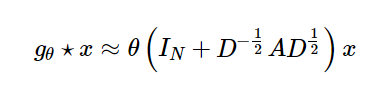

In [ ]:
x = df_final_select
I = np.eye(168)
g_theta = np.matmul((I + ((D**0.5)*A*(D**0.5))),x)
print(g_theta)

     Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium  ...  Unassigned;__;__;__;__;__
0                                                  0.0                                              ...                        0.0
1                                                  0.0                                              ...                        0.0
2                                                  0.0                                              ...                        0.0
3                                                  0.0                                              ...                        0.0
4                                                  0.0                                              ...                        0.0
..                                                 ...                                              ...                        ...
163                                                0.0                             

In [ ]:
target_var = 'Clinical'
features = list(df_final_select.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(g_theta, train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
train_x.shape

(134, 368)

In [ ]:
# train_x = train_x.values.reshape(134, 2, 2, 92)
train_x = train_x.reshape(134, 2, 2, 92)
# test_x = test_x.values.reshape(34, 2, 2, 92)
test_x = test_x.reshape(34, 2, 2, 92)

## Model

In [ ]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(92, (1, 1), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.Conv2D(40, (1, 1), input_shape=train_x.shape[1:]))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(24, activation= 'relu'))
model.add(K.layers.Dropout(0.15))
model.add(K.layers.Dense(3,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 2, 2, 92)          8556      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 40)          3720      
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                3864      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 75        
Total params: 16,215
Trainable params: 16,215
Non-trainable params: 0
__________________________________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=30, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/30
34/34 [==============================] - 1s 13ms/step - loss: 1.0986 - accuracy: 0.3657 - val_loss: 1.1035 - val_accuracy: 0.2059
Epoch 2/30
34/34 [==============================] - 0s 5ms/step - loss: 1.0996 - accuracy: 0.3433 - val_loss: 1.1035 - val_accuracy: 0.2059
Epoch 3/30
34/34 [==============================] - 0s 6ms/step - loss: 1.0991 - accuracy: 0.3134 - val_loss: 1.1038 - val_accuracy: 0.2059
Epoch 4/30
34/34 [==============================] - 0s 6ms/step - loss: 1.0977 - accuracy: 0.3657 - val_loss: 1.1037 - val_accuracy: 0.2059
Epoch 5/30
34/34 [==============================] - 0s 6ms/step - loss: 1.0986 - accuracy: 0.3433 - val_loss: 1.1037 - val_accuracy: 0.2059
Epoch 6/30
34/34 [==============================] - 0s 5ms/step - loss: 1.0984 - accuracy: 0.3507 - val_loss: 1.1038 - val_accuracy: 0.2059
Epoch 7/30
34/34 [==============================] - 0s 6ms/step - loss: 1.0978 - accuracy: 0.3955 - val_loss: 1.1038 - val_accuracy: 0.2059
Epoch 8/30
34/34 [=

|train_accuracy|val_accuracy|
|-----|--------|
|0.4104| 0.2647|  
|0.4030| 0.2647|
|0.4627| 0.3235|
|0.3657| 0.2353|
|0.4104| 0.2647|
|0.3731| 0.2647|
|0.4403| 0.3824|
|0.4552| 0.3235|
|0.3881| 0.3529|
|0.4776| 0.2941|

In [ ]:
train_accuracy = [0.4104,0.4030,0.4627,0.3657,0.4104,0.3731,0.4403,0.4552,0.3881,0.4776]
val_accuracy = [0.2647,0.2647,0.3235,0.2353,0.2647,0.2647,0.3824,0.3235,0.3529,0.2941]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.4187
avg_val_accuracy =  0.297


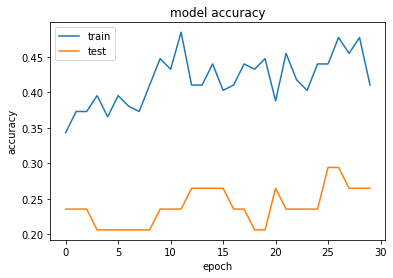

In [ ]:
#0.4104/0.2647
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

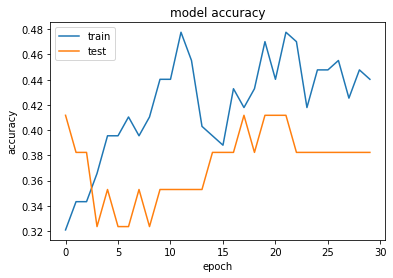

In [ ]:
#0.4403/0.3824
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Transfer Training

In [ ]:
#reshape
!gdown --id '1Vm2XMZQ8HoOGxzQREXQmn33Y40yAPiuT' --output ordinate.csv
C = pd.read_csv("ordinate.csv")
# Xs = df_final_select.values

Downloading...
From: https://drive.google.com/uc?id=1Vm2XMZQ8HoOGxzQREXQmn33Y40yAPiuT
To: /content/ordinate.csv
100% 204k/204k [00:00<00:00, 54.4MB/s]


In [ ]:
# not_select = ['SRR10717998', 'SRR10718078', 'SRR10718037', 'SRR10718080', 'SRR10717987', 'SRR10718039', 'SRR10718095', 'SRR10718000',
#  'SRR10718082', 'SRR10718060', 'SRR10718016', 'SRR10717949', 'SRR10718052', 'SRR10718067', 'SRR10717990', 'SRR10718001',
#  'SRR10717993', 'SRR10717955','SRR10718024', 'SRR10718096', 'SRR10718044', 'SRR10717946', 'SRR10718092', 'SRR10718047',
#  'SRR10717948', 'SRR10718089', 'SRR10718097','SRR10718055', 'SRR10718013', 'SRR10718076', 'SRR10718014', 'SRR10718049',
#  'SRR10717962', 'SRR10717982', 'SRR10718071', 'SRR10717991', 'SRR10718075', 'SRR10718073']
shortrun = C[C['merged'] < 19250].index
C = C.drop(shortrun,axis=0)
C.head()

,index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,merged
0,SRR10717942,-0.148863,-0.015859,-0.182425,0.036586,-0.060318,-0.010474,-0.073774,0.022891,0.045670,0.009416,0.003135,-0.048164,-0.043423,0.046419,-0.015531,0.016605,0.067995,-0.019294,0.002615,-0.063570,-0.008053,0.053429,-0.005841,-0.032327,0.000089,0.026441,-0.003692,0.000019,0.043579,-0.021603,0.006190,0.003795,0.025930,-0.039945,-0.036880,-0.012962,0.046948,0.017464,-0.025889,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23645
1,SRR10717943,-0.155874,-0.015489,-0.166780,0.040794,-0.040257,0.015205,0.039951,-0.042126,-0.024423,0.016980,-0.015751,0.007062,-0.029513,-0.017791,0.047194,0.018195,0.002031,0.030278,-0.037003,-0.001940,0.022938,-0.013325,0.061446,0.015850,-0.005763,-0.008191,-0.023836,0.002106,-0.020018,-0.002994,-0.013115,-0.038409,0.016884,0.010377,0.013561,-0.013599,-0.019550,-0.033015,-0.032819,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22937
2,SRR10717944,-0.212688,0.126506,0.136332,0.149565,-0.107294,0.068687,-0.042806,-0.023720,0.053022,0.052038,0.067566,0.025259,-0.044514,0.037947,0.016528,-0.044443,-0.037207,0.065178,0.010344,-0.019677,-0.013522,-0.012546,0.010742,-0.023155,0.027363,-0.038568,-0.011360,0.009473,-0.012771,-0.001583,-0.003747,0.026933,-0.036237,0.033401,0.007992,-0.034118,0.002309,0.028903,0.007183,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23355
3,SRR10717945,-0.036509,-0.026844,0.033635,0.126231,0.113269,0.034193,0.020957,-0.012934,0.042122,-0.020769,0.045778,-0.063197,0.003277,-0.043442,0.001005,0.032437,0.004249,0.014258,0.005888,0.029863,-0.007705,0.050286,0.028003,0.015712,0.001625,0.004379,-0.053675,0.011616,0.015696,0.006473,-0.006499,0.024532,-0.015546,-0.007611,-0.001774,0.056346,0.024639,0.017048,0.023227,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19504
5,SRR10717947,-0.171395,-0.068856,-0.069648,-0.037126,0.094986,0.026219,0.055954,0.030454,-0.074112,0.052688,-0.018514,-0.004871,-0.034680,-0.025276,0.009162,-0.044719,0.005188,-0.002254,0.000137,-0.035925,-0.039550,-0.032502,0.016004,-0.011044,-0.022212,0.020685,0.035681,0.011047,-0.014573,-0.039898,-0.013890,0.000235,0.017508,0.023251,-0.020433,-0.006334,0.002924,0.000900,0.017421,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29110


In [ ]:
not_select=['index', 'merged']
C_final = C.drop(not_select,axis=1)
C_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 160 entries, 1 to 160
dtypes: float64(84), int64(76)
memory usage: 163.5 KB


In [ ]:
C_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160
0,-0.148863,-0.015859,-0.182425,0.036586,-0.060318,-0.010474,-0.073774,0.022891,0.045670,0.009416,0.003135,-0.048164,-0.043423,0.046419,-0.015531,0.016605,0.067995,-0.019294,0.002615,-0.063570,-0.008053,0.053429,-0.005841,-0.032327,0.000089,0.026441,-0.003692,0.000019,0.043579,-0.021603,0.006190,0.003795,0.025930,-0.039945,-0.036880,-0.012962,0.046948,0.017464,-0.025889,0.018509,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.155874,-0.015489,-0.166780,0.040794,-0.040257,0.015205,0.039951,-0.042126,-0.024423,0.016980,-0.015751,0.007062,-0.029513,-0.017791,0.047194,0.018195,0.002031,0.030278,-0.037003,-0.001940,0.022938,-0.013325,0.061446,0.015850,-0.005763,-0.008191,-0.023836,0.002106,-0.020018,-0.002994,-0.013115,-0.038409,0.016884,0.010377,0.013561,-0.013599,-0.019550,-0.033015,-0.032819,-0.065783,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.212688,0.126506,0.136332,0.149565,-0.107294,0.068687,-0.042806,-0.023720,0.053022,0.052038,0.067566,0.025259,-0.044514,0.037947,0.016528,-0.044443,-0.037207,0.065178,0.010344,-0.019677,-0.013522,-0.012546,0.010742,-0.023155,0.027363,-0.038568,-0.011360,0.009473,-0.012771,-0.001583,-0.003747,0.026933,-0.036237,0.033401,0.007992,-0.034118,0.002309,0.028903,0.007183,-0.023905,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.036509,-0.026844,0.033635,0.126231,0.113269,0.034193,0.020957,-0.012934,0.042122,-0.020769,0.045778,-0.063197,0.003277,-0.043442,0.001005,0.032437,0.004249,0.014258,0.005888,0.029863,-0.007705,0.050286,0.028003,0.015712,0.001625,0.004379,-0.053675,0.011616,0.015696,0.006473,-0.006499,0.024532,-0.015546,-0.007611,-0.001774,0.056346,0.024639,0.017048,0.023227,0.018659,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.171395,-0.068856,-0.069648,-0.037126,0.094986,0.026219,0.055954,0.030454,-0.074112,0.052688,-0.018514,-0.004871,-0.034680,-0.025276,0.009162,-0.044719,0.005188,-0.002254,0.000137,-0.035925,-0.039550,-0.032502,0.016004,-0.011044,-0.022212,0.020685,0.035681,0.011047,-0.014573,-0.039898,-0.013890,0.000235,0.017508,0.023251,-0.020433,-0.006334,0.002924,0.000900,0.017421,-0.040708,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X1 = df_final_select.values
# X2 = C_final.values
# X_final = np.concatenate((X1, X2),axis=1)
X_final = pd.concat([df_final_select, C_final], axis=1)
X_final.shape

(168, 528)

In [ ]:
target_var = 'Clinical'
features = list(X_final.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(X_final[features], train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# train_x = train_x.values.reshape(134, 11, 16, 3)
train_x = train_x.reshape(134, 11, 16, 3)
# test_x = test_x.values.reshape(34, 11, 16, 3)
test_x = test_x.reshape(34, 11, 16, 3)

In [ ]:
train_x = tf.image.resize(train_x, (224, 224))
test_x = tf.image.resize(test_x, (224, 224))

##VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten
# load model
model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=10, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/10
34/34 [==============================] - 12s 282ms/step - loss: 1.3661 - accuracy: 0.2836 - val_loss: 1.1591 - val_accuracy: 0.2353
Epoch 2/10
34/34 [==============================] - 9s 277ms/step - loss: 1.2468 - accuracy: 0.3284 - val_loss: 1.1236 - val_accuracy: 0.2353
Epoch 3/10
34/34 [==============================] - 9s 279ms/step - loss: 1.2675 - accuracy: 0.3060 - val_loss: 1.1314 - val_accuracy: 0.2941
Epoch 4/10
34/34 [==============================] - 9s 277ms/step - loss: 1.2294 - accuracy: 0.3433 - val_loss: 1.1496 - val_accuracy: 0.2941
Epoch 5/10
34/34 [==============================] - 9s 275ms/step - loss: 1.2265 - accuracy: 0.3657 - val_loss: 1.1060 - val_accuracy: 0.2941
Epoch 6/10
34/34 [==============================] - 9s 278ms/step - loss: 1.1704 - accuracy: 0.3284 - val_loss: 1.1049 - val_accuracy: 0.2353
Epoch 7/10
34/34 [==============================] - 9s 276ms/step - loss: 1.1349 - accuracy: 0.2836 - val_loss: 1.0990 - val_accuracy: 0.2353
Epoch

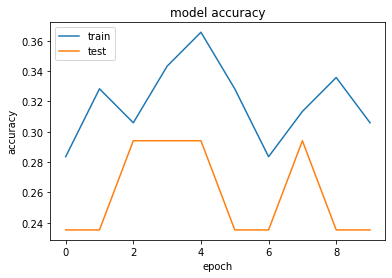

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Resnet50

In [ ]:
# load model
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_43[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 14s 202ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 6s 165ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 6s 166ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 6s 166ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 6s 165ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


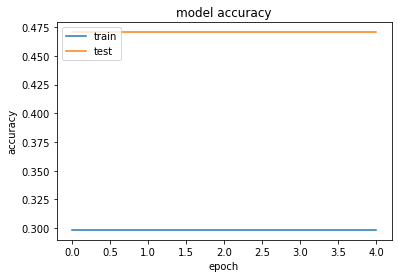

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Resnet101

In [ ]:
# load model
model = tf.keras.applications.ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

171458560/171446536 [==============================] - 2s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_47 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_47[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 30s 366ms/step - loss: nan - accuracy: 0.2687 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 10s 296ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 10s 296ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 10s 296ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 10s 295ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


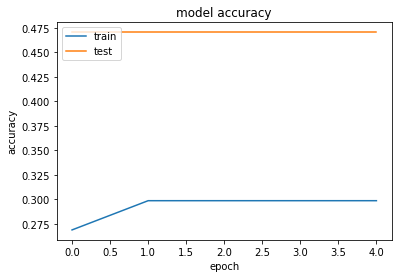

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Resnet152

In [ ]:
# load model
model = tf.keras.applications.ResNet152(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

234708992/234698864 [==============================] - 2s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_48 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_48[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 37s 524ms/step - loss: nan - accuracy: 0.3134 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 14s 426ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 14s 426ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 14s 425ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 14s 425ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


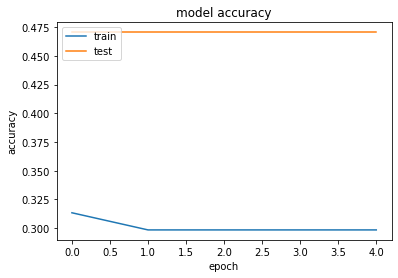

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Densenet121

In [ ]:
# load model
model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 230, 230, 3)  0           input_51[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 22s 237ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 6s 168ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 6s 168ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 6s 167ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 6s 174ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


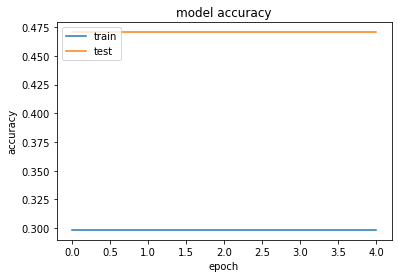

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Densenet169

In [ ]:
# load model
model = tf.keras.applications.DenseNet169(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

51888128/51877672 [==============================] - 1s 0us/step
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_55 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_55[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 35s 374ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 8s 221ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 7s 221ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 8s 222ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 8s 222ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


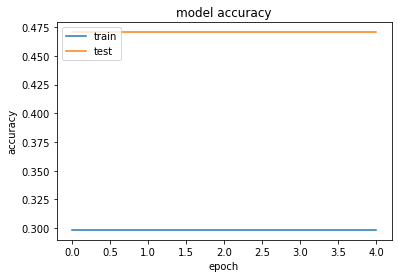

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#MobileNetV2

In [ ]:
# load model
model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_50 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_50[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_____________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 10s 111ms/step - loss: nan - accuracy: 0.3060 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 2s 72ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 2s 72ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 2s 72ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 2s 72ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


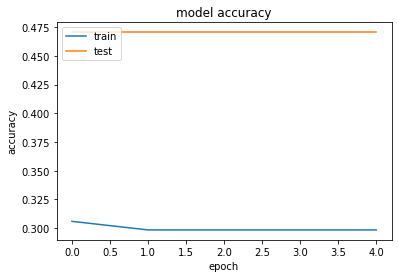

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#InceptionV3

In [ ]:
# load model
model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

87924736/87910968 [==============================] - 2s 0us/step
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_52 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 111, 111, 32) 864         input_52[0][0]                   
__________________________________________________________________________________________________
batch_normalization_110 (BatchN (None, 111, 111, 32) 96          conv2d_117[0][0]                 
__________________________________________________________________________________________________
activation_98 (Activation)      (None, 111, 111, 32) 0           batch_normalization_110[0][0]    
__________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 21s 315ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 5s 155ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 5s 155ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 6s 192ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 5s 158ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


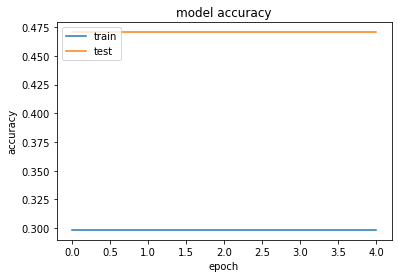

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#InceptionResNetV2

In [ ]:
# load model
model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

219070464/219055592 [==============================] - 2s 0us/step
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_53 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_211 (Conv2D)             (None, 111, 111, 32) 864         input_53[0][0]                   
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 111, 111, 32) 96          conv2d_211[0][0]                 
__________________________________________________________________________________________________
activation_192 (Activation)     (None, 111, 111, 32) 0           batch_normalization_204[0][0]    
________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 40s 503ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 12s 346ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 12s 345ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 12s 360ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 14s 429ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


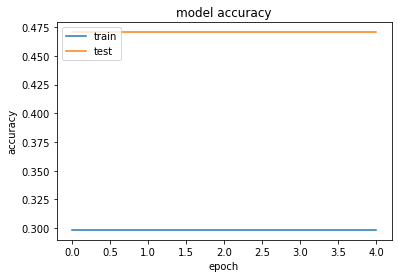

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#EfficientNetB0

In [ ]:
# load model
model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
num_classes = 3
x = model.layers[-1].output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model 
model = K.models.Model(inputs=model.input, outputs=x) 

# summarize the model
model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_54 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_54[0][0]                   
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
__________________________

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=5, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/5
34/34 [==============================] - 18s 232ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 2/5
34/34 [==============================] - 4s 118ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 3/5
34/34 [==============================] - 4s 116ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 4/5
34/34 [==============================] - 4s 114ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706
Epoch 5/5
34/34 [==============================] - 4s 118ms/step - loss: nan - accuracy: 0.2985 - val_loss: nan - val_accuracy: 0.4706


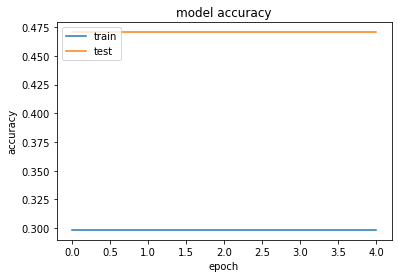

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()